#### Контрольный вопрос: что такое порядок точности метода?
Ваш ответ: это степень, в которую надо возвести величину разбиения сетки $h$, чтобы получить оценку сверху для погрешности метода (при условии, что нет ошибок округления).


Например, если порядок точности метода $2 \Rightarrow |f_{real}(x) - f_{method}(x, h)| < O(h^2)$

#### Контрольный вопрос: какой порядок метода будет при численном дифференцировании по $N$ узлам и почему?

Ваш ответ: (предполагаю, что речь идет о том, что мы хотим построить метод определения значения производной по нескольким заданным значениям функции, тогда) точность такого метода $n-1$

Почему:

TL;DR: потому что СЛАУ с единственным решением можно составить на $n$ переменных. Приращение функции расписывается через ряд Тейлора и делится на $h$, таким образом, старшая производная, участвующая в расчетах, будет порядка $n$, и домножена на $\alpha_{n-1}h^{(n-1)}$ - то есть, точность метода $n-1$.

#### Контрольный вопрос: как называется матрица СЛАУ на коэффициенты метода неопределенных коэффицентов? Существует ли единственное решение системы и почему?

Ваш ответ: Матрица Вандермонда.
Единственное решение у СЛАУ существует в том случае, если расширенная матрица системы (включающая столбец свободных коэффициентов) имеет тот же ранг, что и сама матрица системы.

Это условие выполняется в случае с МНК, потому что мы знаем это из других курсов...

In [65]:
# скрипт, который реализует алгоритм метода неопределенных коэффициентов
import numpy as np
import numpy.linalg as la

def get_diff(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    # формируем матрицу системы в нужном виде
    A = np.fliplr(np.vander(v, v.size)).T 
    b = np.zeros(n)
    b[1] = 1
    alpha = la.solve(A,b)
    diff = 1/h*alpha.dot(u.T)
    return diff

p = 4 # порядок метода
a = np.pi/3
b = np.pi/2
h = (b-a)/p
print('h = ', h)
x = np.linspace(a, b, p+1)
u = np.sin(x) #ищем производную синуса

diff = get_diff(u, 0, p, h)
print('diff = ', diff)

h =  0.13089969389957473
diff =  0.49998238989252053


## Часть 1. Ошибка и обусловленность МНК

Задание:

1. написать скрипт, который строит график зависимости абсолютной ошибки от числа узлов. Используйте логарифмический масштаб, разумное число узлов. Обратите внимание, что сначала ошибка убывает, затем растет. Объясните почему.
2. Написать скрипт, который строит график зависимости числа обусловленности матрицы A системы с ростом ее размерности. Используйте логарифмический масштаб. Объясните поведение графика.

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19)]
[np.float64(0.25587263083736794), np.float64(0.5073103799745023), np.float64(0.5012597239249134), np.float64(0.49998238989251886), np.float64(0.4999979988361018), np.float64(0.5000000182797748), np.float64(0.5000000015876407), np.float64(0.5000000001402797), np.float64(0.4999999948951701), np.float64(0.5000002976316755), np.float64(0.49999401966048534), np.float64(0.4996917609533908), np.float64(0.4859692161444317), np.float64(0.4814452549578018), np.float64(-14.92398306232112), np.float64(0.49163888038445014), np.float64(0.36233377067277667), np.float64(0.4244233390872276)]


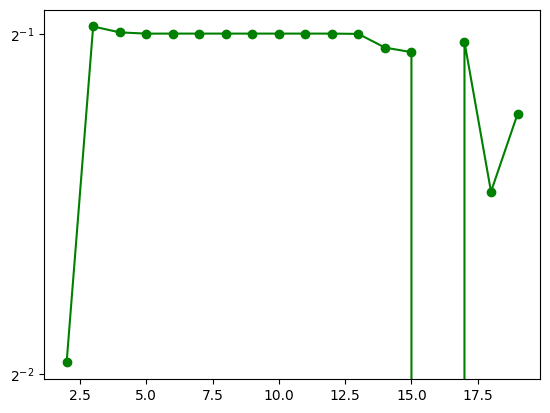

In [66]:
import matplotlib.pyplot as plt

# порядок метода равен количеству узлов, поэтому будем использовать его как основной параметр в цикле
orders = []
errors = []
for order in np.arange(2, 20):
  h = (b-a)/order
  x = np.linspace(a, b, int(order), h)
  u = np.sin(x)
  orders.append(order)
  errors.append(get_diff(u, 0, order, h))

plt.plot(orders, errors, color='green', marker='o')
plt.yscale('log', base=2)
plt.show()

## Часть 2. Оценка порядка точности метода

Рассмотрим метод с порядком точности $p$. Тогда ошибка метода $\epsilon_h = Ch^p$, где $h$ - сеточный шаг. На сетке с двое меньшим шагом ошибка метода будет $\epsilon_{h/2} = C_1 \left(\frac{h}{2}\right)^p$. Если шаг h достаточно мелкий (ф-я меняется не очень сильно), то можно считать, что $C \approx C_1$. Тогда, исключив $C$ из первого равенства за счет второго, можно получить, что
$$
p = \log_2 \frac{\epsilon_h}{\epsilon_{h/2}}
$$

Задание:

3. написать скрипт, который численно будет определять порядок точности методов направленная разность и центральная разность. Построить график зависимости p от шага сетки в широком диапазоне значений h. На графике для h использовать логарифмический масштаб. Объяснить поведение графиков. Исследуйте при это области как слева, так и справа от плато. Почему положения плато отличаются для двух методов и находятся именно на своих уровнях (обосновать аналитически).

## Часть 3. Дифференцирование с использованием полиномиальной интерполяции

Предложите вариант решения задачи численного дифференцирования на основании метода полиномиальной интерполяции по известным значениям функции. Реализуйте алгоритм, сравните его с МНК. Что общего у методов?